# MNIST (Random Forest)

In [1]:
# libraries
%matplotlib inline
from __future__ import print_function
from sklearn.datasets import fetch_mldata
from sklearn import metrics, cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import timeit

In [2]:
# load MNIST data
mnist = fetch_mldata("MNIST original")

# rescale the data
X, y = mnist.data / 255., mnist.target

# separate train, test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

### Random Forest:
- number of trees: 250

In [3]:
classifier = RandomForestClassifier(250, n_jobs=-1)
start_time = timeit.default_timer()
classifier.fit(X_train, y_train)
elapsed = timeit.default_timer() - start_time
print("Time: %.2f sec" % (elapsed))
predicted = classifier.predict(X_test)

Time: 26.94 sec


### Cross validation
- fold: 5

In [4]:
start_time = timeit.default_timer()
scores = cross_validation.cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1)
elapsedCV = timeit.default_timer() - start_time
print("Cross validatione time: %.2f sec" % (elapsedCV))
np.set_printoptions(precision=4)
print("Cross validation scores:", scores)
print("Cross validation mean: %0.3f (+/-%0.03f)" % (scores.mean(), scores.std() * 2))

Cross validatione time: 110.36 sec
Cross validation scores: [ 0.9695  0.9672  0.9658  0.9644  0.9718]
Cross validation mean: 0.968 (+/-0.005)


### Classification metrics:

In [5]:
print("\nAccuracy on test data: %.4f" % metrics.accuracy_score(y_test, predicted))


Accuracy on test data: 0.9696


#### Confusion matrix:

In [9]:
print(metrics.confusion_matrix(y_test, predicted, range(10)))

[[ 970    0    0    0    0    2    3    1    3    1]
 [   0 1122    3    3    0    1    4    0    1    1]
 [   6    0  997    7    3    0    3    9    7    0]
 [   1    0   10  973    0    7    0    9    8    2]
 [   1    0    1    0  955    0    4    0    3   18]
 [   2    1    0   15    2  857    5    1    6    3]
 [   6    3    0    0    3    4  938    0    4    0]
 [   1    3   17    2    1    0    0  991    4    9]
 [   5    0    6    6    3    5    3    3  933   10]
 [   6    5    1   11   12    2    1    5    6  960]]


#### Classification report:
- precision: truePositives / (truePositives + falsePositives)
- recall: truePositives / Positives
- f1-score: 2 * (precision * recall) / (precision + recall)
- support: Cantidad de ocurrencias

In [7]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98       980
        1.0       0.99      0.99      0.99      1135
        2.0       0.96      0.97      0.96      1032
        3.0       0.96      0.96      0.96      1010
        4.0       0.98      0.97      0.97       982
        5.0       0.98      0.96      0.97       892
        6.0       0.98      0.98      0.98       958
        7.0       0.97      0.96      0.97      1028
        8.0       0.96      0.96      0.96       974
        9.0       0.96      0.95      0.95      1009

avg / total       0.97      0.97      0.97     10000



### Error samples:

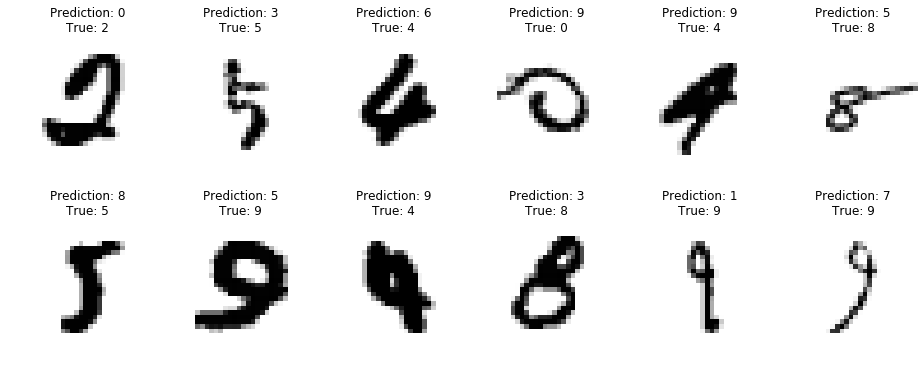

In [8]:
misslabels = predicted[y_test != predicted]
reallabels = y_test[y_test != predicted]
missimages = X_test[y_test != predicted]
choice = np.random.choice(range(len(misslabels)), 12, replace=False)
plt.figure(figsize=(16, 6))
for index, i in enumerate(choice):
    plt.subplot(2, 6, index+1)
    plt.axis('off')
    plt.imshow(missimages[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i\nTrue: %i' % (misslabels[i], reallabels[i]))

Save results:

In [21]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predicted, range(10)))
df.to_csv('randomForest.csv')
with open('randomForestTime.txt', 'w') as file_:
    file_.write('%.4f' % elapsed)

### Plot pixel importances

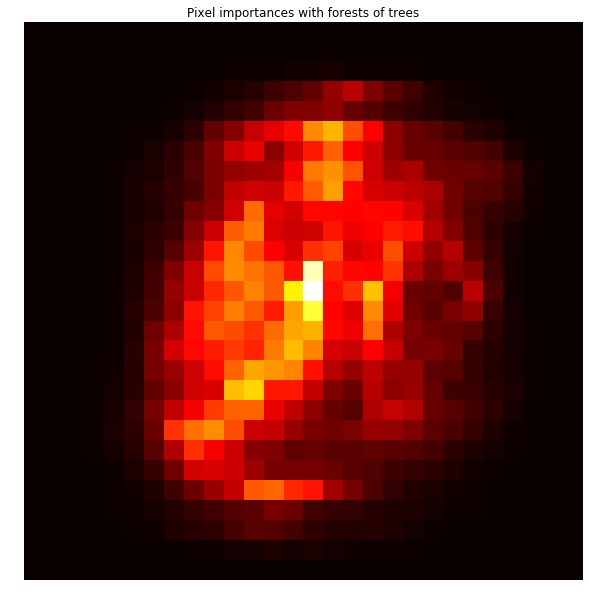

In [15]:
importances = classifier.feature_importances_
importances = importances.reshape(28, 28)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(importances, cmap=plt.cm.hot, interpolation='nearest')
plt.title("Pixel importances with forests of trees")
plt.show()